#  K-Nearest Neighbors (KNN)

In this notebook, I will:
- Understand how KNN makes predictions
- Train a KNN model for classification
- Explore how different values of "K" affect accuracy
- Visualise decision boundaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [3]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # K = 3
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (k=3): {acc:.2f}")


KNN Accuracy (k=3): 1.00


=== KNN Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



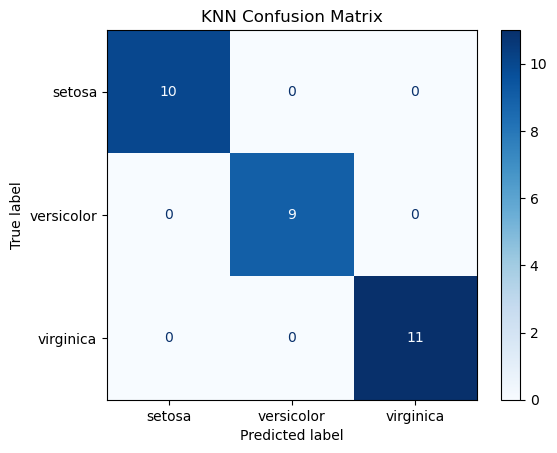

In [4]:
print("=== KNN Classification Report ===")
print(classification_report(y_test, y_pred, target_names=data.target_names))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=data.target_names, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()


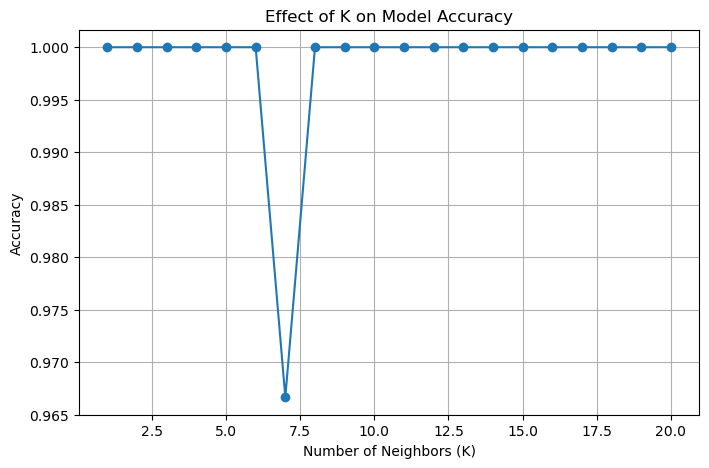

Best K value: 1 with accuracy 1.00


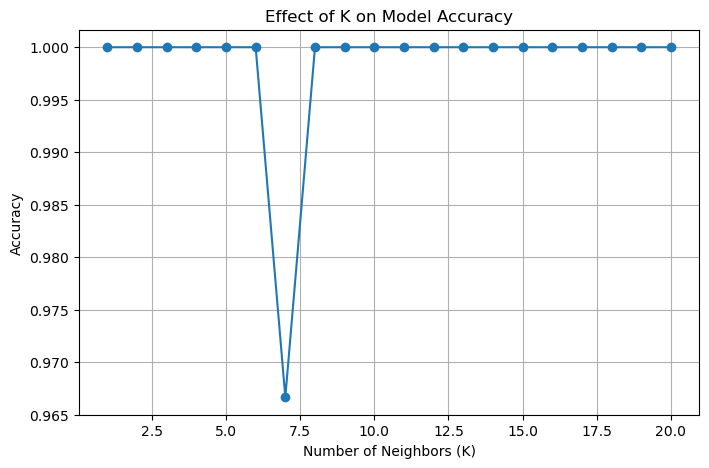

Best K value: 1 with accuracy 1.00


In [5]:
# Test accuracy for different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Effect of K on Model Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k} with accuracy {max(accuracies):.2f}")
# Test accuracy for different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Effect of K on Model Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k} with accuracy {max(accuracies):.2f}")


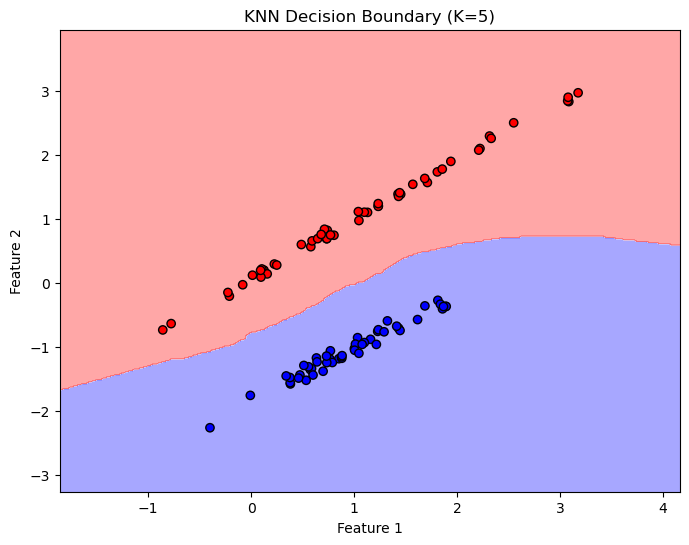

In [6]:
from sklearn.datasets import make_classification

# Make simple 2D data
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, n_samples=100, random_state=42)

# Train KNN on this small dataset
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Plot decision boundary
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="bwr")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap="bwr", edgecolor='k')
plt.title("KNN Decision Boundary (K=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## How KNN Works

KNN (K-Nearest Neighbors) is a **lazy learning algorithm**:
- It **stores** all training data
- To predict a new point, it:
  1. Calculates the **distance** (usually Euclidean) to all training points
  2. Selects the **K nearest neighbors**
  3. Predicts the majority label among them

###  Key Parameters:
| Parameter | Description |
|------------|--------------|
| `n_neighbors` | Number of neighbors (K) |
| `metric` | Distance metric (default: Euclidean) |
| `weights` | Can be 'uniform' or 'distance' (weighted by proximity) |

### Choosing K:
- Small K → sensitive to noise (overfitting)  
- Large K → smoother, may underfit


In [7]:
for metric in ['euclidean', 'manhattan', 'minkowski']:
    model = KNeighborsClassifier(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Metric: {metric}, Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Metric: euclidean, Accuracy: 1.00
Metric: manhattan, Accuracy: 1.00
Metric: minkowski, Accuracy: 1.00


In [ ]:
## ✅ Summary

| Concept | Description |
|----------|-------------|
| Algorithm | K-Nearest Neighbors (KNN) |
| Type | Supervised Classification |
| Key Idea | Classify based on closest samples |
| Training | No explicit training — just store data |
| Key Parameters | `n_neighbors`, `metric`, `weights` |
| Strengths | Simple, intuitive, works well for small data |
| Weaknesses | Slow on large datasets, sensitive to scale |

📈 KNN is a great baseline model — easy to understand and visualize, but not ideal for very large datasets.
